<a href="https://colab.research.google.com/github/Waga43/ETTM-ArewaDS-Deep-Learning/blob/main/Part_1_Deep_Learning_with_Pytorch/exercise_submissions/week_3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa Data Science Academy
### Deep Learning Cohort1.0

#### Name: Abdulwasiu Bamidele Popoola
#### Email: waga43tech@gmail.com
#### Title: Week 3 Solution

# 02. PyTorch Classification Exercises



In [ ]:
# Import torch
import torch

# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [ ]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_moons(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=RANDOM_SEED) # keep random state so we get the same values

In [ ]:
X[:5]

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       [ 0.41276802, -0.37638459],
       [-0.84532016,  0.52879908]])

In [ ]:
y[:5]

array([1, 1, 1, 1, 0])

From the output of the cell above, it is obvious that we have two features. We will name these features X1 and X2.

In addition, the output shows we have one label which we will name y.

In [ ]:
# Turn data into a DataFrame
import pandas as pd
moons_df = pd.DataFrame({'X1': X[:, 0],
                   'X2': X[:, 1,],
                   'label': y})

moons_df.head()

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


The above dataframe table displays the two features X1 and X2 with the target variable, y, named label

In [ ]:
# See the number of unique classes for our target variable, y
moons_df.label.value_counts()

,count
label,
1,500
0,500


The above cell output indicates we have two classes for our target variable, thus making it a binary classification problem.

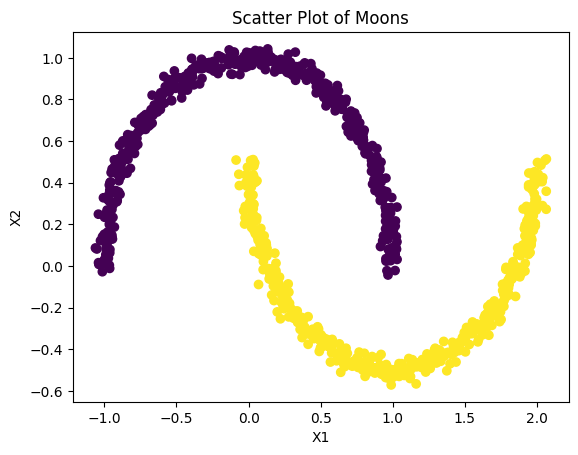

In [ ]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.scatter(x = moons_df.X1,
            y = moons_df.X2,
            c = y)
plt.title("Scatter Plot of Moons")
plt.xlabel('X1')
plt.ylabel("X2")
plt.show()


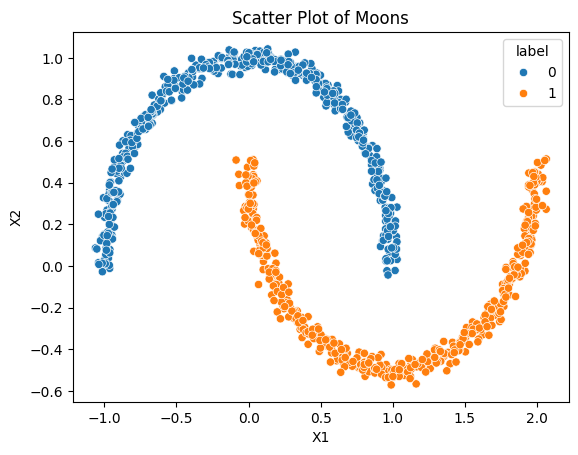

In [ ]:
# Using seaborn library to plot scatter plot

import seaborn as sns
sns.scatterplot(data=moons_df, x='X1', y='X2', hue='label')
plt.title("Scatter Plot of Moons")
plt.xlabel('X1')
plt.ylabel("X2")
plt.show()

Next let's check the shape of our features and label

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and for y: {y_sample.shape}")

Values for one sample of X: [-0.00933187  0.39098105] and for y: 1
Shapes for one sample of X: (2,) and for y: ()


The output of the cell above indicates that X is a `vector` (with two features X1 and X2) while y is a `scaler` with one feature.

We therefore have two features/inputs (X1 and X2) and one output (y).

In [ ]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)


# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)




In [ ]:
print(f"Length of X train:\t{len(X_train)}\n"
      f"Length of X test:\t{len(X_test)}\n"
      f"Length of y train:\t{len(y_train)}\n"
      f"Length of y test:\t{len(y_test)}"
      )

Length of X train:	800
Length of X test:	200
Length of y train:	800
Length of y test:	200


There are 800 train samples and 200 test samples for our model

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [ ]:
# import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the moon data
class MoonModelV0(nn.Module):
    def __init__(self):
      super().__init__()

      # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
      self.layer_1 = nn.Linear(in_features=2, out_features=20)
      self.layer_2 = nn.Linear(in_features=20, out_features=20)
      self.layer_3 = nn.Linear(in_features=20, out_features=20)
      self.layer_4 = nn.Linear(in_features=20, out_features=20)
      self.layer_5 = nn.Linear(in_features=20, out_features=1)
      self.relu = nn.ReLU() # <- add in ReLU activation function


    def forward(self, x):
      return self.layer_5(self.relu(self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))))

# Instantiate the model
model_0 = MoonModelV0().to(device)
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=20, bias=True)
  (layer_4): Linear(in_features=20, out_features=20, bias=True)
  (layer_5): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1160],
        [-0.1164],
        [-0.1229],
        [-0.1163],
        [-0.1282],
        [-0.1293],
        [-0.1179],
        [-0.1187],
        [-0.1221],
        [-0.1158]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


It appears that there are the same amount of predictions as there are test labels but the predictions don't look like they're in the same form or shape as the test labels, i.e. the shapes of the test labels and predictions is different.

Now lets view these in a pandas dataframe

In [ ]:
# Put the untrained_preds and test in a pandas Dataframe
# Use the detach, numpy and cpu methods for the code to execute successfully
test_untrained_pred_df = pd.DataFrame({'test': y_test.cpu().numpy(),
                                       'untrained_preds': untrained_preds.detach().cpu().numpy().flatten() # Flatten the array or use squeeze method
                                      }
                                     )

test_untrained_pred_df.head(10)

,test,untrained_preds
0,1.0,-0.115998
1,0.0,-0.116428
2,1.0,-0.122920
3,0.0,-0.116300
4,1.0,-0.128217
5,1.0,-0.129316
6,0.0,-0.117904
7,0.0,-0.118719
8,1.0,-0.122076
9,0.0,-0.115840


## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [ ]:
# Setup loss function
loss_fxn = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [ ]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
y_logits = model_0(X_test.to(device))[:5]
y_logits

# Prediction probabilities by using sigmoid on model logits
print("Pred probs:")
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

# Prediction labels
print("Pred labels:")
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

Logits:
Pred probs:
Pred labels:
tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [ ]:
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [ ]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [ ]:
# 2nd Method for accuracy by defining a function
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    accr = (correct / len(y_preds)) * 100
    return accr

In [ ]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()


  # 1. Forward pass (logits output)
  y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device

  # Turn logits into prediction probabilities
  # turn logits -> pred probs
  y_pred_probs = torch.sigmoid(y_logits)

  # Turn prediction probabilities into prediction labels
  # turn pred probs -> pred labels
  y_preds = torch.round(y_pred_probs)

  # 2. Calculaute the loss
  loss = loss_fxn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(y_preds, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()


  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model_0(X_test).squeeze()

    # Turn the test logits into prediction labels
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Caculate the test loss/accuracy
    test_loss = loss_fxn(test_logits,
                            y_test)
    test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)


  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69622, Accuracy: 0.50% | Test loss: 0.69577, Test acc: 12.50%
Epoch: 100 | Loss: 0.59256, Accuracy: 0.81% | Test loss: 0.59568, Test acc: 20.25%
Epoch: 200 | Loss: 0.24183, Accuracy: 0.89% | Test loss: 0.24218, Test acc: 22.50%
Epoch: 300 | Loss: 0.19682, Accuracy: 0.91% | Test loss: 0.20244, Test acc: 22.00%
Epoch: 400 | Loss: 0.13550, Accuracy: 0.94% | Test loss: 0.13987, Test acc: 23.38%
Epoch: 500 | Loss: 0.04012, Accuracy: 1.00% | Test loss: 0.03868, Test acc: 25.00%
Epoch: 600 | Loss: 0.01105, Accuracy: 1.00% | Test loss: 0.01028, Test acc: 25.00%
Epoch: 700 | Loss: 0.00517, Accuracy: 1.00% | Test loss: 0.00474, Test acc: 25.00%
Epoch: 800 | Loss: 0.00315, Accuracy: 1.00% | Test loss: 0.00283, Test acc: 25.00%
Epoch: 900 | Loss: 0.00219, Accuracy: 1.00% | Test loss: 0.00194, Test acc: 25.00%


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [ ]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

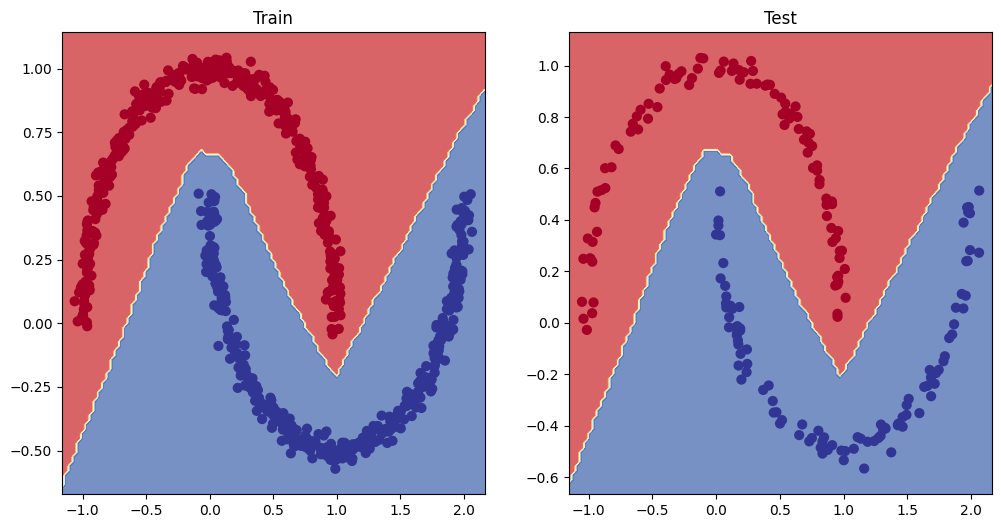

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [ ]:
# Create a straight line tensor


In [ ]:
# Test torch.tanh() on the tensor and plot it


In [ ]:
# Replicate torch.tanh() and plot it


## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

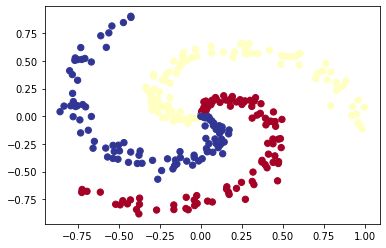

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split


In [ ]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
# acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
# acc_fn

In [ ]:
# Prepare device agnostic code
# device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module



# Instantiate model and send it to device


In [ ]:
# Setup data to be device agnostic


# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
## Your code here ##

print("Pred probs:")
## Your code here ##

print("Pred labels:")
## Your code here ##

Logits:
Pred probs:
Pred labels:


In [ ]:
# Setup loss function and optimizer
# loss_fn =
# optimizer =

In [ ]:
# Build a training loop for the model

# Loop over data


  ## Training

  # 1. Forward pass


  # 2. Calculate the loss


  # 3. Optimizer zero grad


  # 4. Loss backward


  # 5. Optimizer step


  ## Testing


    # 1. Forward pass

    # 2. Caculate loss and acc

  # Print out what's happening every 100 epochs


In [ ]:
# Plot decision boundaries for training and test sets
